In [1]:
import pandas as pd
import datetime
import matplotlib.pyplot as plt
import numpy as np 

dataset = pd.read_csv('data/satellites.csv')

# removing irrelevant columns 
dataset = dataset.drop(columns=['CCSDS_OMM_VERS', 'COMMENT', 'CREATION_DATE', 'ORIGINATOR', 'OBJECT_NAME', 'OBJECT_ID', 'CENTER_NAME', 
                        'REF_FRAME', 'TIME_SYSTEM', 'MEAN_ELEMENT_THEORY', 'EPHEMERIS_TYPE', 'CLASSIFICATION_TYPE', 'ELEMENT_SET_NO', 
                        'REV_AT_EPOCH', 'BSTAR', 'MEAN_MOTION_DOT', 'MEAN_MOTION_DDOT', 'SITE', 'DECAY_DATE', 'FILE', 'GP_ID', 
                        'TLE_LINE0', 'TLE_LINE1', 'TLE_LINE2'])

In [2]:
def epoch(df_column):
    date_list = list(df_column) 
    new_date_list = []

    for data in date_list:
        date, time = data.split('T')
        year, month, day = date.split('-')
        hour, minute, second = time.split(':')
        second = second[0:2]

        new_date_list.append(datetime.datetime(int(year), int(month), int(day), int(hour), 
        int(minute), int(second)).timestamp())

    return new_date_list

In [3]:
# only selecting data in LEO 
dataset = dataset[dataset['SEMIMAJOR_AXIS'] < 8371]
dataset['EPOCH'] = epoch(dataset['EPOCH'])

In [16]:
dataset.to_csv('data/satelite2.csv', index=False)
display(dataset)
print(min(dataset['INCLINATION']), max(dataset['INCLINATION']))
print(max(dataset['NORAD_CAT_ID']))
print(set(dataset['RCS_SIZE']))

,EPOCH,MEAN_MOTION,ECCENTRICITY,INCLINATION,RA_OF_ASC_NODE,ARG_OF_PERICENTER,MEAN_ANOMALY,NORAD_CAT_ID,SEMIMAJOR_AXIS,PERIOD,APOAPSIS,PERIAPSIS,OBJECT_TYPE,RCS_SIZE,COUNTRY_CODE,LAUNCH_DATE
1,1.635694e+09,13.754973,0.003072,82.9193,299.1120,158.9093,201.3337,26743,7358.038,104.689,1002.507,957.299,DEBRIS,SMALL,CIS,1979.0
3,1.635675e+09,14.775907,0.006062,98.4781,8.7205,37.3771,323.1632,26754,7015.076,97.456,679.465,594.417,DEBRIS,SMALL,PRC,1999.0
4,1.635699e+09,14.724482,0.006226,98.4232,122.0724,345.1605,27.6061,26755,7031.400,97.796,697.039,609.491,DEBRIS,SMALL,PRC,1999.0
5,1.635739e+09,14.384765,0.008523,98.7597,287.9689,54.5300,306.3803,26756,7141.674,100.106,824.406,702.671,DEBRIS,SMALL,PRC,1999.0
30,1.635706e+09,13.496296,0.006741,100.3344,151.9642,291.8206,198.6383,26816,7451.758,106.696,1123.854,1023.393,DEBRIS,SMALL,US,1966.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14367,1.634038e+09,15.465781,0.001190,99.0098,214.6827,219.1613,140.8771,87970,6804.882,93.109,434.844,418.650,TBA,NaN,NaN,NaN
14368,1.635659e+09,14.967557,0.005560,99.0272,141.1159,76.8926,283.8489,89171,6955.066,96.208,615.599,538.263,TBA,NaN,NaN,NaN
14369,1.635648e+09,12.909691,0.056673,31.9916,262.9339,162.7824,199.2858,270007,7675.817,111.544,1732.692,862.672,TBA,NaN,NaN,NaN
14370,1.635667e+09,14.245319,0.005822,98.6758,348.3068,187.0288,173.0081,270207,7188.204,101.086,851.919,768.219,TBA,NaN,NaN,NaN


0.0494 144.5862
270288
{'SMALL', 'MEDIUM', 'LARGE', nan}


In [5]:
list_sma = sorted(dataset['SEMIMAJOR_AXIS'])
arrays = np.array_split(list_sma, 8)

subsections = []
for i in arrays:
    subsections.append(max(i))
print(subsections)


[6904.541, 6925.362, 7024.6, 7127.719, 7189.4, 7243.753, 7387.845, 8370.819]


In [6]:
plot_data = dataset[['ECCENTRICITY', 'SEMIMAJOR_AXIS']].sort_values(by=['SEMIMAJOR_AXIS'])


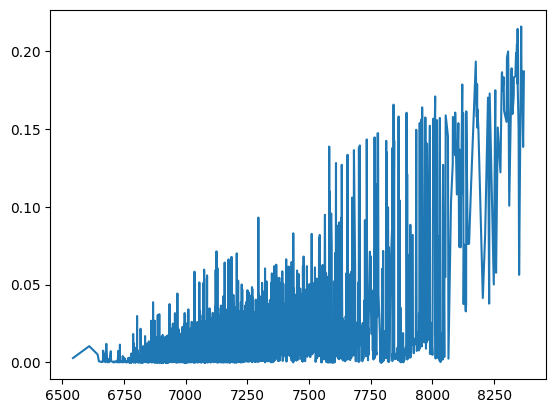

In [7]:
plt.plot(plot_data['SEMIMAJOR_AXIS'], plot_data['ECCENTRICITY'])
plt.show()

In [25]:
(3 + (3 * 2)) % 9

0

In [24]:
10 % 

9